In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
sympy.init_printing()

import sys
sys.path.append("/home/ex/Documents/Hons/CBT/Skogestad-Python")
import utils

In [2]:
s = sympy.Symbol('s')

In [422]:
def G(s):
    return numpy.array([[1/(s+2), 3],
                        [(s+1)/(s**2 + 2*s + 1), 5/(s**2 + 0.8*s + 4)]])

def compensator(s):
    return numpy.matrix([
[  (-0.928002*s**2 - 1.382558723646*s - 0.514539393213244)/(0.85558*s**2 + 1.29273774542*s + 0.44787161835511),    (0.509539*s**2 + 0.284490400331*s + 0.0169160143310471)/(0.270761*s**2 + 0.617855482642*s + 0.34453577715575)],
[(0.837391*s**2 + 0.688203094222*s + 0.109681717323021)/(0.544102*s**2 + 0.683154883528*s + 0.214293569268724), (-0.000509*s**2 - 0.000760483157*s - 0.000281241041674868)/(0.942798*s**2 + 0.39028066008*s + 0.033789928874097)]])


def K(s):
    Ks = numpy.array([0.00181812, 0.05750061])/5
    tauis = numpy.array([0.15398098, 2.01643491])
    return numpy.diag(Ks*(1 + 1/tauis/s)) 

In [436]:
GK = sympy.Matrix(G(s)) @ sympy.Matrix(compensator(s)) @ sympy.Matrix(K(s))
# GK = sympy.Matrix(G(s)) @ sympy.Matrix(K(s))

GK = GK.applyfunc(sympy.cancel)

In [453]:
sympy.print_latex(sympy.Matrix(K(s)).applyfunc(sympy.cancel))

\left[\begin{matrix}\frac{1.0 \left(0.000363624 s + 0.00236148646410745\right)}{s} & 0\\0 & \frac{1.0 \left(0.011500122 s + 0.00570319524967954\right)}{s}\end{matrix}\right]


In [437]:
# GK

In [438]:
# T = GK * (sympy.eye(2) + GK)**(-1)

# GK = T.applyfunc(sympy.cancel)
# GK

In [439]:
nums, dens = numpy.zeros(GK.shape).tolist(), numpy.zeros(GK.shape).tolist()
for i in range(GK.shape[0]):
    for j in range(GK.shape[1]):
        gk = GK[i, j]
        n, d = [sympy.Poly(a, s).all_coeffs() for a in gk.as_numer_denom()]
        nums[i][j] = n
        dens[i][j] = d
        if numpy.any(numpy.real(numpy.poly1d(d).r) > 1e-8):
            print("RHP pole")
#             print(numpy.poly1d(d))
            print(numpy.poly1d(d).r[numpy.poly1d(d).r > 1e-8])
            
nums = numpy.array(nums)
dens = numpy.array(dens)
delays = numpy.zeros(GK.shape)
# nums, dens

In [440]:
# Gnum = [[[-1], [-1]], [[1], [1]]]
# Gden = [[[10, 1], [10, 1]], [[1e10, 1], [60, 1]]]
# Gdelay = [[0, 0], [0, 0]]

# G = utils.InternalDelay.from_tf_coefficients(Gnum, Gden, Gdelay)

# K1, K2, t1, t2 = -2.5, 2, 12.5, 57

# Knum = [[[K1*t1, K1], [0]], [[0], [K2*t2, K2]]]
# Kden = [[[t1, 0], [1]], [[1], [t2, 0]]]
# Kdelay = [[0, 0], [0, 0]]

# K = utils.InternalDelay.from_tf_coefficients(Knum, Kden, Kdelay)

# L = G * K

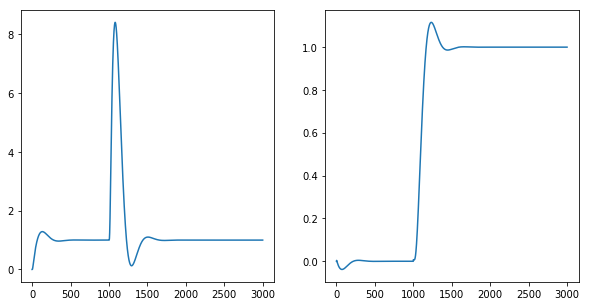

In [444]:
L = utils.InternalDelay.from_tf_coefficients(nums, dens, delays)

Inum = [[[1], [0]], [[0], [1]]]
Iden = [[[1], [1]], [[1], [1]]]
Idelay = [[0, 0], [0, 0]]

I = utils.InternalDelay.from_tf_coefficients(Inum, Iden, Idelay)

T = L * (I + L)**(-1)

def uf(t):
    if t < 1000:
        return [1, 0]
    return [1, 1]

ts = numpy.linspace(0, 3000, 6000)
ys = T.simulate(uf, ts)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ts, ys[:, 0])

plt.subplot(1, 2, 2)
plt.plot(ts, ys[:, 1])
plt.savefig("resp.pdf")
plt.show()